In [1]:
#IMPORT MODULES
#import libraries for further use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing
import scipy

In [2]:
#Load Dataset
df = pd.read_csv('IRIS.csv')

In [3]:
#viewing the dataset for top 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#Summarization of data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Preprocesing the dataset
#checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
#showing null values in percentage format
missing_values = df.isnull().sum()
total = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.shape[0]*100))
percent = percent.sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1,
                        keys = ['Total Missing Values','Percentage of Missing values'])
missing_data['data(dtypes)'] = df[missing_data.index].dtypes
missing_data

,Total Missing Values,Percentage of Missing values,data(dtypes)
sepal_length,0,0.0,float64
sepal_width,0,0.0,float64
petal_length,0,0.0,float64
petal_width,0,0.0,float64
species,0,0.0,object


<AxesSubplot: >

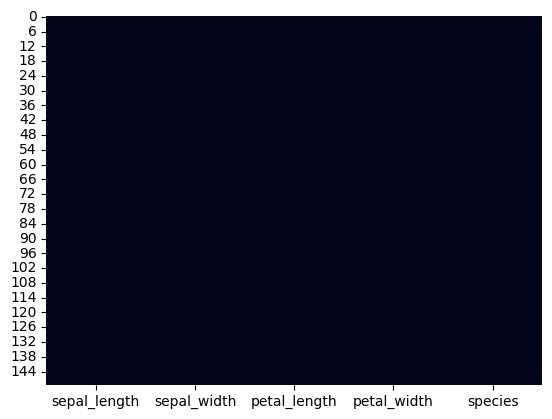

In [11]:
#visualization using heatmap
sns.heatmap(df.isnull(),cbar = False)

<AxesSubplot: >

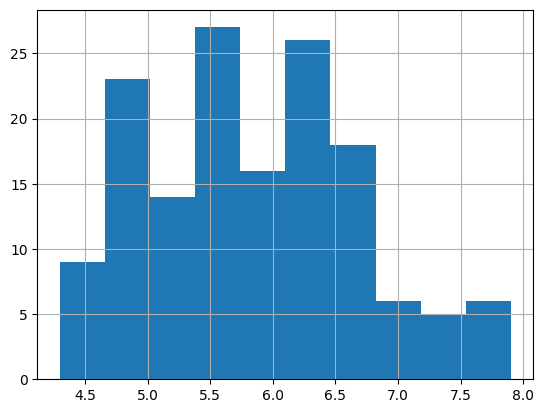

In [12]:
# Analyzing using histogram for columns in dataset
df['sepal_length'].hist()

<AxesSubplot: >

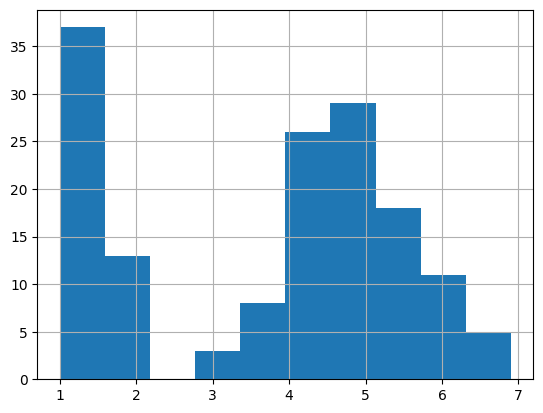

In [13]:
df['petal_length'].hist()

<AxesSubplot: >

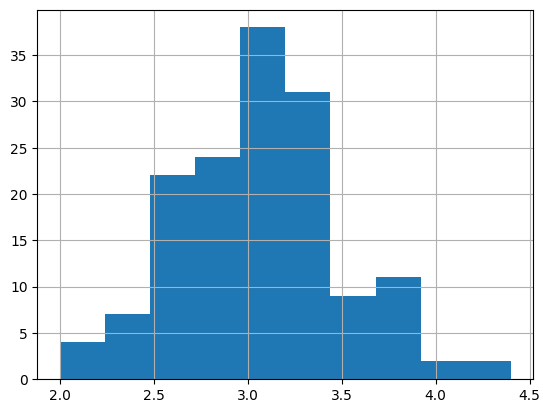

In [14]:
df['sepal_width'].hist()

<AxesSubplot: >

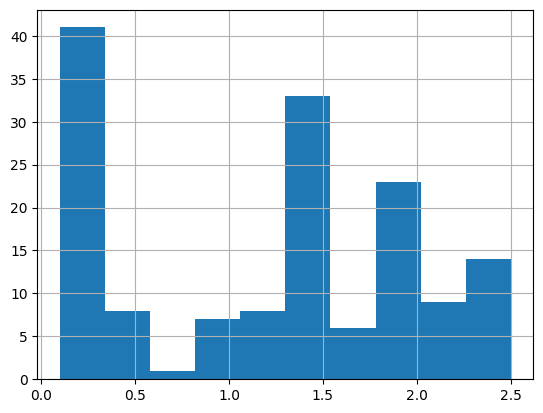

In [15]:
df['petal_width'].hist()

In [16]:
# scatter plot
colors = ['red','orange','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

Text(0, 0.5, 'Sepal_width')

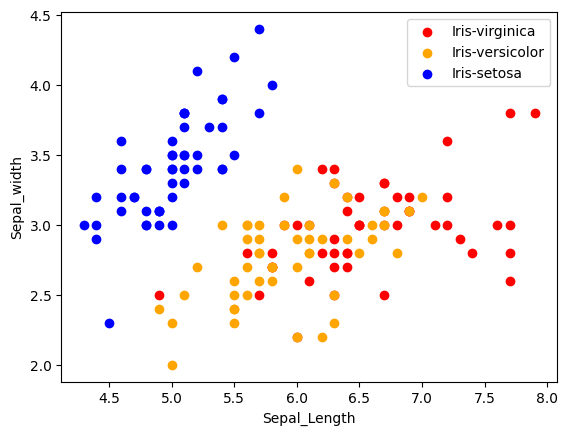

In [17]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'], c = colors[i],label = species[i])
plt.legend()
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_width')

Text(0, 0.5, 'Petal_width')

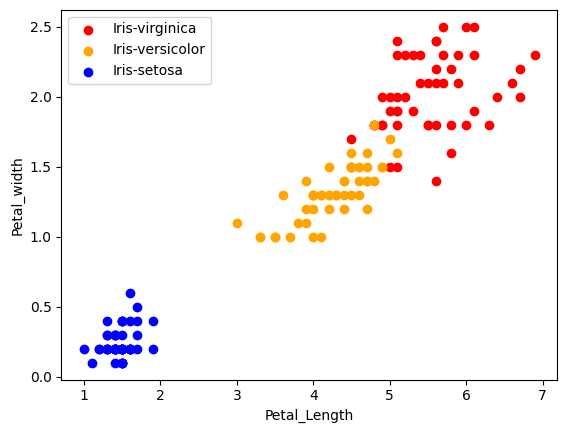

In [18]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'],x['petal_width'], c = colors[i],label = species[i])
plt.legend()
plt.xlabel('Petal_Length')
plt.ylabel('Petal_width')

Text(0, 0.5, 'Petal_Lenth')

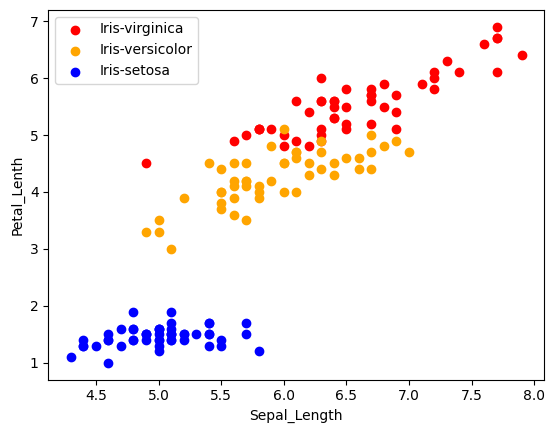

In [19]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'], c = colors[i],label = species[i])
plt.legend()
plt.xlabel('Sepal_Length')
plt.ylabel('Petal_Lenth')

Text(0, 0.5, 'Petal_width')

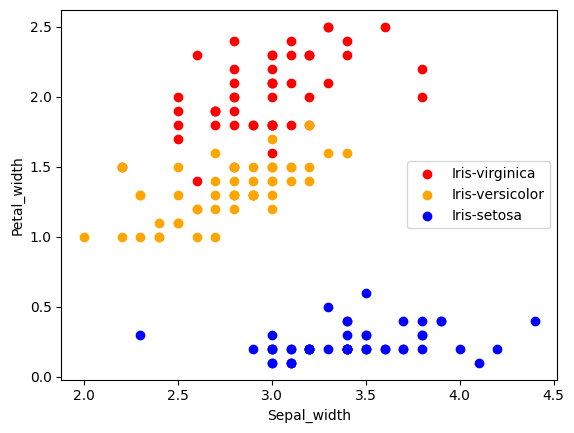

In [20]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'], c = colors[i],label = species[i])
plt.legend()
plt.xlabel('Sepal_width')
plt.ylabel('Petal_width')

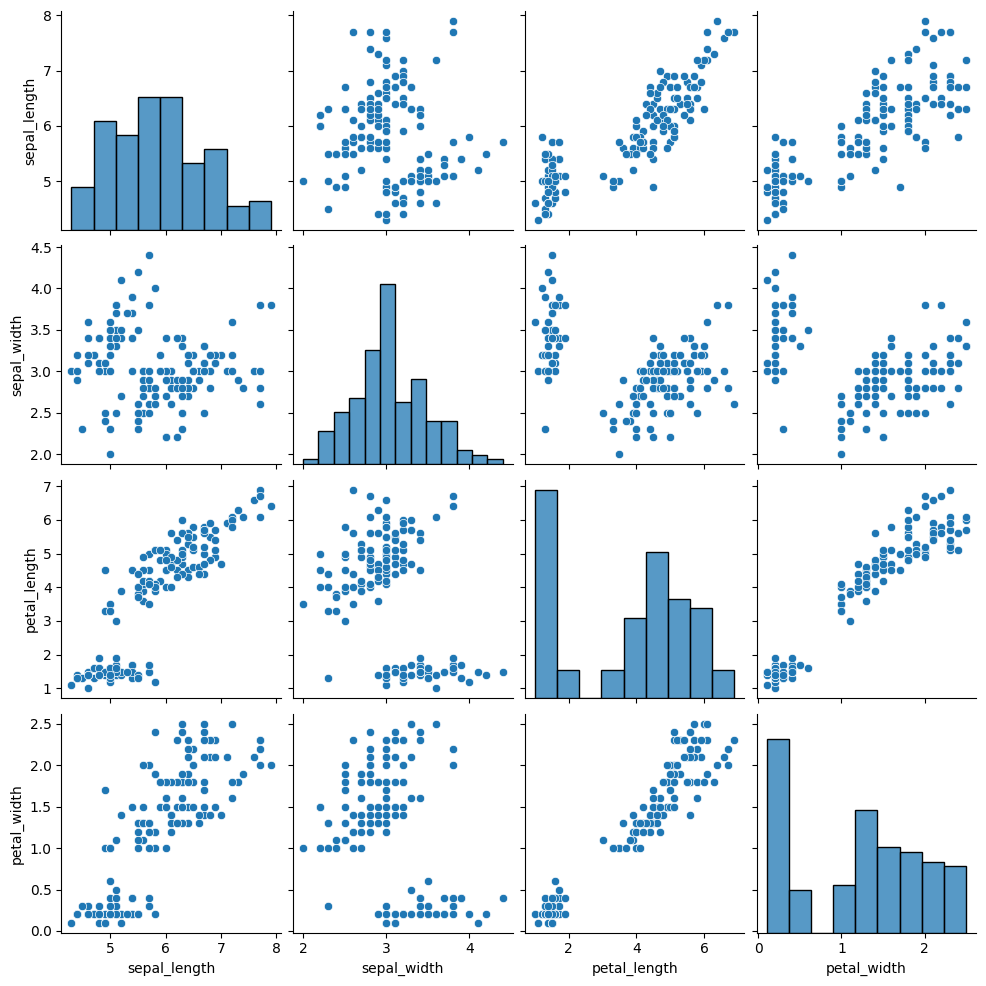

In [22]:
sns.pairplot(df)

In [23]:
# correlational matrix for dataset
df.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_22964\928575017.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\Dell\AppData\Local\Temp\ipykernel_22964\2221401063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<AxesSubplot: >

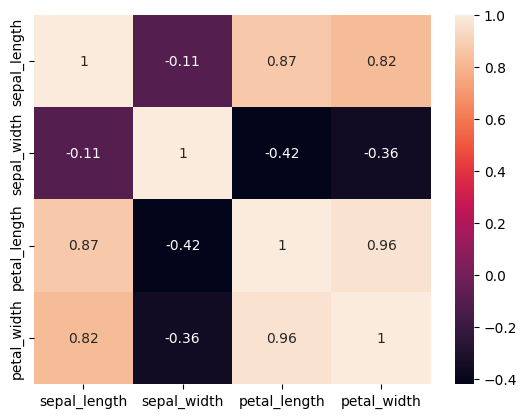

In [24]:
sns.heatmap(df.corr(),annot = True)

In [25]:
# Label Encoder
import sklearn
from sklearn.preprocessing import LabelEncoder
labelencode = LabelEncoder()
df['species'] = labelencode.fit_transform(df['species'])

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
df['species'].unique()

array([0, 1, 2])

In [28]:
# Data Spliting
from sklearn.model_selection import train_test_split

In [29]:
#training the model
#training data = 70%
#testing data = 30%
#splitting data using X and Y varibles
X = df.values[:,0:4]
Y = df.values[:,4]

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30)

In [31]:
#USING MODEL ALGORITHMS
# K-Nearest-Neighbor Algorithm
# IMPORTING KNN
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()

In [32]:
model2.fit(X_train,Y_train)

KNeighborsClassifier()

In [33]:
#findinng the accuracy
from warnings import filterwarnings
filterwarnings('ignore')
print("The Accuracy : ",model2.score(X_test,Y_test) * 100)

The Accuracy :  97.77777777777777


In [34]:
pre2 = model2.predict(X_test)
from warnings import filterwarnings
filterwarnings('ignore')

In [35]:
for i in range(len(pre2)):
    print("The given Data is:  ",X_test[i],"The predicted Output is:   ","-->>",pre2[i])
#0 indicates Iris-setosa
#1 indicates Iris-Versicolor
#2 indicates Iris-virginica

The given Data is:   [5.7 4.4 1.5 0.4] The predicted Output is:    -->> 0.0
The given Data is:   [6.8 3.2 5.9 2.3] The predicted Output is:    -->> 2.0
The given Data is:   [4.8 3.4 1.6 0.2] The predicted Output is:    -->> 0.0
The given Data is:   [7.7 2.6 6.9 2.3] The predicted Output is:    -->> 2.0
The given Data is:   [6.2 3.4 5.4 2.3] The predicted Output is:    -->> 2.0
The given Data is:   [6.7 2.5 5.8 1.8] The predicted Output is:    -->> 2.0
The given Data is:   [7.  3.2 4.7 1.4] The predicted Output is:    -->> 1.0
The given Data is:   [4.8 3.4 1.9 0.2] The predicted Output is:    -->> 0.0
The given Data is:   [5.7 3.  4.2 1.2] The predicted Output is:    -->> 1.0
The given Data is:   [7.7 2.8 6.7 2. ] The predicted Output is:    -->> 2.0
The given Data is:   [4.4 3.2 1.3 0.2] The predicted Output is:    -->> 0.0
The given Data is:   [4.9 3.1 1.5 0.1] The predicted Output is:    -->> 0.0
The given Data is:   [6.3 3.3 4.7 1.6] The predicted Output is:    -->> 1.0
The given Da

In [36]:
#performing classsification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,pre2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       0.94      1.00      0.97        15
         2.0       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

